<a href="https://colab.research.google.com/github/Muhammad-kaif2/Machine_Learning_model/blob/main/lasso_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
Lasso Regression ek Linear Regression hi hoti hai,
lekin ye extra rule (penalty) lagati hai taake model overfit na ho
aur unimportant features ko ignore kar de
```



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

LinearRegression()

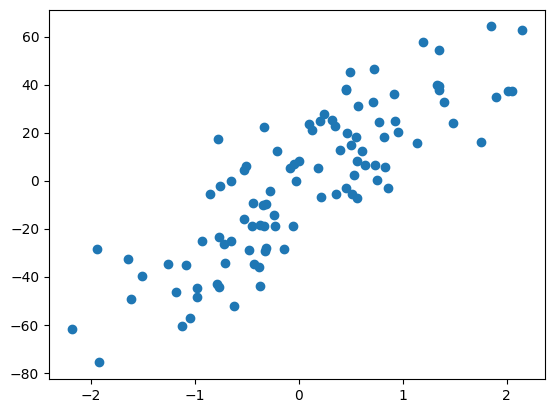

In [ ]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

L = LinearRegression()
L.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
acc_tra = r2_score(y_train,L.predict(X_train))
err = np.sqrt(mean_squared_error(y_train,L.predict(X_train)))
print(f'train_accurecy {acc_tra}')
print(f'train_err {err}')

train_accurecy 0.6936574894808998
train_err 17.195601770310375


In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
acc_test = r2_score(y_test,L.predict(X_test))
err = np.sqrt(mean_squared_error(y_test,L.predict(X_test)))
print(f'test_accurecy {acc_test}')
print(f'test_err {err}')

test_accurecy 0.6741187350980362
test_err 15.463978643072705


**Lasso_regression**

In [ ]:
le = Lasso(alpha=1)
le.fit(X_train,y_train)

Lasso(alpha=1)

In [ ]:
r_acc_tra = r2_score(y_train,le.predict(X_train))
r_err = np.sqrt(mean_squared_error(y_train,le.predict(X_train)))
print(f'train_accurecy {r_acc_tra}')
print(f'train_err {r_err}')

train_accurecy 0.692432728044245
train_err 17.229941604206175


In [ ]:
r_acc_test = r2_score(y_test,le.predict(X_test))
r_err = np.sqrt(mean_squared_error(y_test,le.predict(X_test)))
print(f'test_accurecy {r_acc_test}')
print(f'test_err {r_err}')

test_accurecy 0.6753863440567062
test_err 15.433873541433922


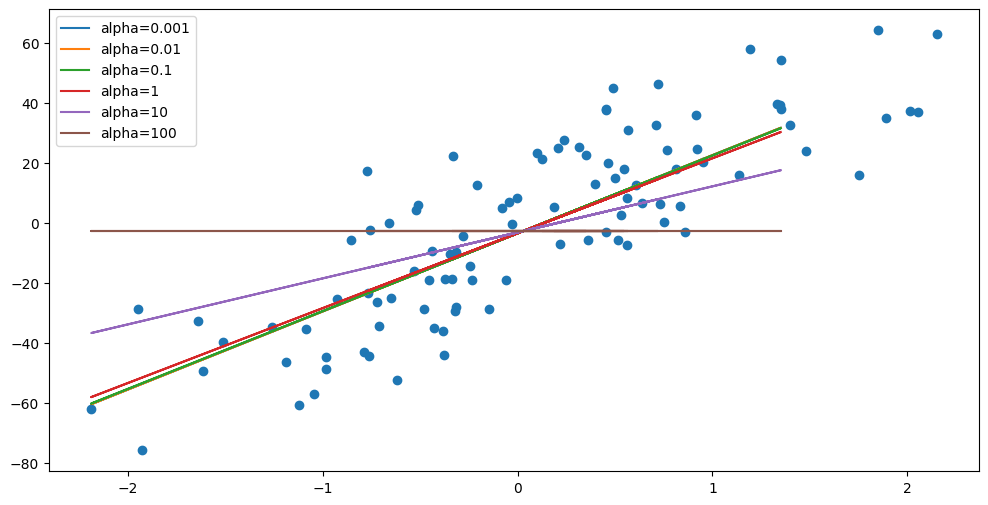

In [ ]:

alphas = [0.001, 0.01, 0.1, 1, 10, 100]
plt.figure(figsize=(12,6))
plt.scatter(X,y)
for i in alphas:
    La = Lasso(alpha=i)
    La.fit(X_train,y_train)
    plt.plot(X_test,La.predict(X_test),label='alpha={}'.format(i))
plt.legend()
plt.show()


In [ ]:
la = Lasso(alpha=0.01)
la.fit(X_train,y_train)

Lasso(alpha=0.01)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
acc_test = r2_score(y_test,La.predict(X_test))
err = np.sqrt(mean_squared_error(y_test,La.predict(X_test)))
print(f'test_accurecy {acc_test}')
print(f'test_err {err}')

test_accurecy -0.09577494884001747
test_err 34.13918875853503


In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100], cv=5)
lasso_cv.fit(X_train, y_train)
print("✅ Best alpha:", lasso_cv.alpha_)


✅ Best alpha: 0.001


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.108e+04, tolerance: 7.261e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

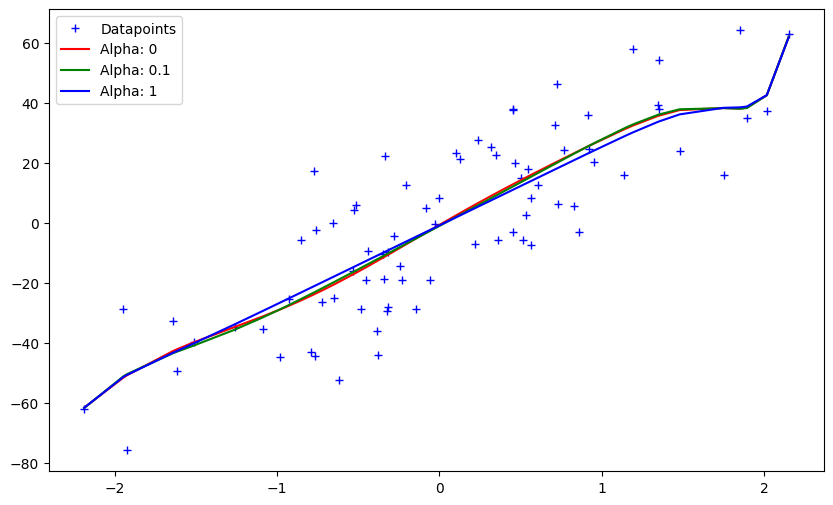

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

def get_preds_lasso(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('lasso', Lasso(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 0.1, 1]
cs = ['r', 'g', 'b']

x1 = X_train # Assign X_train to x1
x2 = y_train # Assign y_train to x2

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_lasso(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()